# Práctica 1: Aprendizaje automático

__Fecha de entrega: 30 de Febrero de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

## Apartado 3: Regresión

__Número de grupo: 14__

__Nombres de los estudiantes: Javier Fernández Parrondo y Carlos Murcia Morilla__

En este notebook trabajaremos con un conjunto de datos tomado del repositorio de la Universidad de California Irvine. En concreto, se trata de un conjunto de datos sobre distintos vinos del norte de Portugal (vinho verde)  que puedes encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality). 

El objetivo es modelar la calidad del vino (con un valor de 0 a 10) en base a variables que reflejan sus propiedades físicas y químicas. En concreto, las propiedades son las siguientes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol 

De cara a la memoria que vas a realizar puedes investigar sobre estas propiedades para explicar mejor qué miden y cómo afectan al vino. 

La calidad del vino es una variable que toma valores entre 0 y 10. 

Para modelar la relación entre la calidad del vino y sus propiedades usaremos una red neuronal. 

### 1) Descripción de los datos

Carga el fichero de datos `calidad_vinos.csv` en un dataframe. 

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media, y aquella que está más concentrada en torno a la media. Reflexiona sobre la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa.

Estudia la distribución de la calidad del vino en el conjunto de datos.

In [1]:
import pandas as pd

df = pd.read_csv("calidad_vinos.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [3]:
"""total sulfur dioxide es la variable que tiene un valor extremo más acusado con respecto a la media, por lo que esta 
variable está muy dispersa, y density es el que tiene un valor extremo muy cercano a su media por lo que esta poco dispersa
Las variables que mas influyen a la hora de decidir la calidad del vino son: el alcohol ya que esta suficientemente
correlacionada positivamente con el quality y el volatile acidity que tambien esta suficientemente correlacionado pero
negativamente.
Yo diria que es mas eficaz cuando las clases son linealmente separables, por lo que al estar demasiado dispersa
total sulfur dioxide puede llegar a perjudicar al entrenamiento del perceptron multicapa"""

'total sulfur dioxide es la variable que tiene un valor extremo más acusado con respecto a la media, por lo que esta \nvariable está muy dispersa, y density es el que tiene un valor extremo muy cercano a su media por lo que esta poco dispersa\nLas variables que mas influyen a la hora de decidir la calidad del vino son: el alcohol ya que esta suficientemente\ncorrelacionada positivamente con el quality y el volatile acidity que tambien esta suficientemente correlacionado pero\nnegativamente.\nYo diria que es mas eficaz cuando las clases son linealmente separables, por lo que al estar demasiado dispersa\ntotal sulfur dioxide puede llegar a perjudicar al entrenamiento del perceptron multicapa'

### 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, selecciona las variables que estén más correlacionadas con él (estableciendo para ello un valor umbral que consideres adecuado).

In [4]:
correl=df.corr()
correl['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [9]:
df3 = pd.DataFrame()
df3['volatile acidity'] = df['volatile acidity']
df3['citric acid'] = df['citric acid']
df3['sulphates'] = df['sulphates']
df3['alcohol'] = df['alcohol']
df3.head(11)

,volatile acidity,citric acid,sulphates,alcohol
0,0.70,0.00,0.56,9.4
1,0.88,0.00,0.68,9.8
2,0.76,0.04,0.65,9.8
3,0.28,0.56,0.58,9.8
4,0.70,0.00,0.56,9.4
5,0.66,0.00,0.56,9.4
6,0.60,0.06,0.46,9.4
7,0.65,0.00,0.47,10.0
8,0.58,0.02,0.57,9.5
9,0.50,0.36,0.80,10.5


### 3) Normalización

Decide si debes o no normalizar los datos de entrada y/o de salida. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.


In [10]:
RANDOM_STATE=333

In [28]:
"""No tenemos que reescalar los datos ya que son todos de grados comprendidos entre 10 elevado a -1 y 10 elevado a 1
aunque por lo general en los perceptrones multicapa viene muy bien reescalar los datos"""

'No tenemos que reescalar los datos ya que son todos de grados comprendidos entre 10 elevado a -1 y 10 elevado a 1\naunque por lo general en los perceptrones multicapa viene muy bien reescalar los datos'

### 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 250 neuronas
- La segunda con varias capas ocultas entre las que debes distribuir 250 neuronas, como te parezca

Asegúrate de que no salen warnings durante el entrenamiento indicando que no se ha alcanzado la convergencia durante el entrenamiento (para arreglarlo basta con poner un número de max_iter suficientemente grande).

En la configuración del perceptrón debes usar validación cruzada y explorar varios valores para el parámetro `alpha` que controla el coeficiente de regularización L2.

Para elegir el valor adecuado de dicho coeficiente pinta la curva de aprendizaje para cada perceptrón. En la curva debes pintar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica. 

Una vez tengas la curva de aprendizaje: 
  - Identifica las diferencias de comportamiento entre ambos perceptrones, razona o especula sobre por qué se dan. ¿Hay alguno que domine al otro? ¿Es el comportamiento de uno más volátil que el del otro?
  - Determina de manera razonada con qué perceptrón te quedas y el valor óptimo del parámetro de regularización.


In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [26]:
cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(1, ), activation='relu', solver='adam', alpha=regul_param, batch_size=250, 
             learning_rate='constant', learning_rate_init=0.5, max_iter=2000, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, df3, df['quality'].ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.662753883297223,
  -0.6659047255364798,
  -0.6654021230713651,
  -0.6658910338593003,
  -0.6658679928854412,
  -0.6639823598844614],
 [0.07061127463439018,
  0.04931102682186593,
  0.04941600457519612,
  0.04924686475233527,
  0.049184136218966085,
  0.0507122924564026])

In [23]:
cv2_scores_mean=[]
cv2_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp2=MLPRegressor(hidden_layer_sizes=(10, ), activation='relu', solver='adam', alpha=regul_param, batch_size=25, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores2 = cross_val_score(mlp2, df3, df['quality'].ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv2_scores_mean.append(scores2.mean())
    cv2_scores_std.append(scores2.std())

cv2_scores_mean, cv2_scores_std

([-0.4498301313203464,
  -0.4421257447289494,
  -0.4488369680220708,
  -0.44624467796052103,
  -0.4402122396717997,
  -0.44470566560845926],
 [0.01659613715401715,
  0.029202364474520313,
  0.02265900404381001,
  0.02507827365458186,
  0.01804122634175747,
  0.02390716980188523])

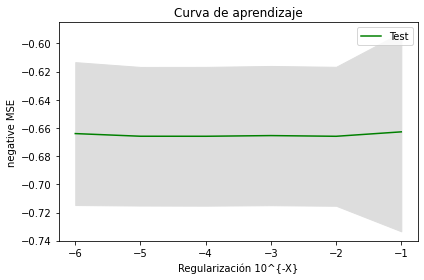

In [27]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

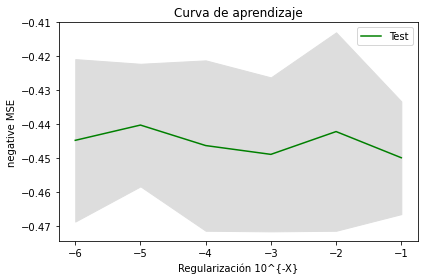

In [25]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv2_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv2_scores_mean) - np.array(cv2_scores_std)
upper_limit = np.array(cv2_scores_mean) + np.array(cv2_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
"""Hemos decidido quedarnos con el perceptron 2, el de 10 capas con 25 neuronas, ya que para el otro perceptron vemos que 
es muy necesario aumentar considerablemente el ratio de aprendizaje inicial"""

### 5) Medición y análisis del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción de la calidad de todos los vinos usando validación cruzada. 

A continuación:
- Muestra varias medidas de error y razona sobre si el error te parece pequeño o no para el problema que estás analizando
- Muestra el histograma de la distribución del error o del error en valor absoluto, y razona de nuevo si te parece que el modelo ha predicho bien o no. Identifica los vinos para los cuales el modelo ha fallado más.
- Analiza el error cometido para los vinos según su puntuación de calidad observada (3, 4, etc). Describe lo que sucede, explica por qué crees que sucedió y razona de nuevo si te parece que el modelo funciona bien o tiene limitaciones. 